<a href="https://colab.research.google.com/github/sayantanmitra902/DAT5/blob/master/Text_Analysis_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Problem Statement**

Our goal here is to look at transcripts of various comedians and note their similarities and differences.



**Getting The Data**

Luckily, there are wonderful people online that keep track of stand up routine transcripts. Scraps From The Loft makes them available for non-profit and educational purposes.

To decide which comedians to look into, I went on IMDB and looked specifically at comedy specials that were released in the past 5 years. To narrow it down further, I looked only at those with greater than a 7.5/10 rating and more than 2000 votes. If a comedian had multiple specials that fit those requirements, I would pick the most highly rated one. I ended up with a dozen comedy specials.


In [ ]:
import requests
from bs4 import BeautifulSoup
import pickle

In [ ]:
# we will use web scrapping to scrap the data from the web. 
def url_transcript(url):
  page=requests.get(url).text
  soup=BeautifulSoup(page,'lxml')
  text=[p.text for p in soup.find(class_="post-content").find_all('p')]
  return text

In [ ]:
# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [ ]:
#loaing the data into a dictionary while scrapping.
data={}
transcripts=[url_transcript(urls) for urls in urls]
for i,c in enumerate(comedians):
  data[c]=transcripts[i]

In [ ]:
data.keys()

dict_keys(['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe'])

In [ ]:
next(iter(data.values()))

['Intro\nFade the music out. Let’s roll. Hold there. Lights. Do the lights. Thank you. Thank you very much. I appreciate that. I don’t necessarily agree with you, but I appreciate very much. Well, this is a nice place. This is easily the nicest place For many miles in every direction. That’s how you compliment a building And shit on a town with one sentence. It is odd around here, as I was driving here. There doesn’t seem to be any difference Between the sidewalk and the street for pedestrians here. People just kind of walk in the middle of the road. I love traveling And seeing all the different parts of the country. I live in New York. I live in a– There’s no value to your doing that at all.',
 '“The Old Lady And The Dog”\nI live– I live in New York. I always– Like, there’s this old lady in my neighborhood, And she’s always walking her dog. She’s always just– she’s very old. She just stands there just being old, And the dog just fights gravity every day, just– The two of them, it’s re

In [ ]:
def combine_text(text):
  return ''.join(text)

**Data Cleaning**

We will now work on cleaning the text data. Now there are countless methods for data cleaning however, we will try few of them here in this notebook including data cleaning using regular expressions and identification and removal of stopwords.

In [ ]:
import re
import string

def clean_transcript(text):
  #changing text to smaller case, removing words within brackets, removing punctuations and remove words containing numbers in the middle.
  text=''.join(text)
  text=text.lower()
  text=re.sub('\[.*?\]','',text)
  text=re.sub('[%s]'% re.escape(string.punctuation),'',text)
  text=re.sub('\w*\d\w*','',text)
  text=re.sub('[‘’“”…]', '', text)
  text=re.sub('\n', '', text)
  text=text.replace('^\w','')
  return text

function=lambda x: clean_transcript(text)

In [ ]:
#cleaning the data and storing it into another dictionary.
data_combined={key:[clean_transcript(value)] for (key,value) in data.items()}

In [ ]:
data_combined.items()

dict_items([('louis', ['introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with you but i appreciate very much well this is a nice place this is easily the nicest place for many miles in every direction thats how you compliment a building and shit on a town with one sentence it is odd around here as i was driving here there doesnt seem to be any difference between the sidewalk and the street for pedestrians here people just kind of walk in the middle of the road i love traveling and seeing all the different parts of the country i live in new york i live in a– theres no value to your doing that at allthe old lady and the dogi live– i live in new york i always– like theres this old lady in my neighborhood and shes always walking her dog shes always just– shes very old she just stands there just being old and the dog just fights gravity every day just– the two of them its really– the dogs got a cloudy 

In [ ]:
#we then move the data into a dataframe for better usability. 
import pandas as pd
data_df=pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns=['Transcripts']
data_df.sort_index()

,Transcripts
ali,ladies and gentlemen please welcome to the sta...
anthony,thank you thank you thank you san francisco th...
bill,all right thank you thank you very much thank...
bo,bo what old macdonald had a farm e i e i o and...
dave,this is dave he tells dirty jokes for a living...
hasan,whats up davis whats up im home i had to bri...
jim,ladies and gentlemen please welcome to the ...
joe,ladies and gentlemen welcome joe rogan wha...
john,armed with boyish charm and a sharp wit the fo...
louis,introfade the music out lets roll hold there l...


In [ ]:
data_df.Transcripts['ali']

'ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have to get this shit over with cause i have to pee in like ten minutes but thank you everybody so much for comingum its a very exciting day for me its been a very exciting year for me i turned  this year yes thank you five people i appreciate that uh i can tell that im getting older because now when i see an  girl my automatic thought is fuck you fuck you i dont even know you but fuck you cause im straight up jealous im jealous first and foremost of their metabolism because  girls they could just eat like shit and then they take a shit and have a sixpack right they got thatthat beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating throughand then when they go to sleep they just go to sleep right they dont have insomnia yet they dont know what its like to have to take a a

In [ ]:
data_df.Transcripts[0]

'introfade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agree with you but i appreciate very much well this is a nice place this is easily the nicest place for many miles in every direction thats how you compliment a building and shit on a town with one sentence it is odd around here as i was driving here there doesnt seem to be any difference between the sidewalk and the street for pedestrians here people just kind of walk in the middle of the road i love traveling and seeing all the different parts of the country i live in new york i live in a– theres no value to your doing that at allthe old lady and the dogi live– i live in new york i always– like theres this old lady in my neighborhood and shes always walking her dog shes always just– shes very old she just stands there just being old and the dog just fights gravity every day just– the two of them its really– the dogs got a cloudy eye and shes got a clou

In [ ]:
#Let's create a dtm and exclude the stopwords. we will go with unigram while initializing the countvectorizer.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')
stopwords=stopwords.words('english')
cv=CountVectorizer(stop_words=stopwords,ngram_range=(1,2))
data_cv=cv.fit_transform(data_df.Transcripts)
data_dtm=pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index=data_df.index
data_dtm=data_dtm.transpose()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data_dtm.head()

,louis,dave,ricky,bo,bill,jim,john,hasan,ali,anthony,mike,joe
aaaaah,0,0,0,0,1,0,0,0,0,0,0,0
aaaaah anybody,0,0,0,0,1,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaahhhhhhh oh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:

dict_analysis={}
for c in data_dtm.columns:
  values=data_dtm[c].sort_values(ascending=False).head(100)
  dict_analysis[c]=list(zip(values.index,values.values))

In [ ]:
for comedian,words in (dict_analysis.items()):
  print('\n')
  print(comedian)
  print(', '.join([word for word,count in words]))



louis
like, know, get, dont, thats, youre, im, people, life, thing, go, gonna, hes, one, cause, theres, every, would, shit, good, tit, time, right, theyre, think, really, see, dont know, course, even, guy, kids, murder, ok, always, old, didnt, mean, fuck, way, women, happened, ha, first, live, said, say, look, nice, sitting, die, could, nobody, yes, date, lot, love, food, ever, maybe, better, older, tits, second, worst, come, shes, day, bad, part, well, put, dog, little, things, two, start, man, kid, never, ill, got, kind, need, going, gotta, ha ha, saying, young, something, still, looking, im sitting, ends, three, person, hope, thank, back, says


dave
like, know, said, im, shit, people, didnt, ahah, dont, time, thats, fuck, fucking, black, one, man, would, good, got, see, back, ahah ahah, get, show, right, gonna, gay, nigga, lot, go, hes, every, oj, oh, yeah, come, even, dont know, guys, kevin, take, think, really, first, dave, remember, looked, want, whats, youre, women, guy, us, 

In [ ]:
#let's discover words which may not be a part of our stopword list but get used most commonly amongst the comedians. We can remove those words from our corpus. 
from collections import Counter
top_count=[]
for comedian in data_df.index:
  top=[word for (word,count) in dict_analysis[comedian]]
  for t in top:
    top_count.append(t)

In [ ]:
Counter(top_count).most_common()

[('like', 12),
 ('know', 12),
 ('get', 12),
 ('dont', 12),
 ('thats', 12),
 ('youre', 12),
 ('im', 12),
 ('people', 12),
 ('go', 12),
 ('one', 12),
 ('time', 12),
 ('right', 12),
 ('think', 12),
 ('see', 12),
 ('never', 12),
 ('going', 12),
 ('hes', 11),
 ('every', 11),
 ('would', 11),
 ('really', 11),
 ('say', 11),
 ('could', 11),
 ('come', 11),
 ('day', 11),
 ('got', 11),
 ('back', 11),
 ('yeah', 11),
 ('gonna', 10),
 ('good', 10),
 ('theyre', 10),
 ('dont know', 10),
 ('even', 10),
 ('didnt', 10),
 ('fuck', 10),
 ('way', 10),
 ('first', 10),
 ('said', 10),
 ('ever', 10),
 ('look', 9),
 ('well', 9),
 ('little', 9),
 ('man', 9),
 ('oh', 9),
 ('want', 9),
 ('make', 9),
 ('thing', 8),
 ('cause', 8),
 ('theres', 8),
 ('shit', 8),
 ('shes', 8),
 ('need', 8),
 ('cant', 8),
 ('life', 7),
 ('guy', 7),
 ('love', 7),
 ('things', 7),
 ('kid', 7),
 ('ill', 7),
 ('guys', 7),
 ('ive', 7),
 ('old', 6),
 ('mean', 6),
 ('lot', 6),
 ('fucking', 6),
 ('us', 6),
 ('goes', 6),
 ('tell', 6),
 ('always', 5

With the above analysis we discovered that we could add few more words into our stopword list as these words are getting used by more than 50% of the comedians.

In [ ]:
from sklearn.feature_extraction import text
new_stop_words=[word for (word,count) in Counter(top_count).most_common() if count>6] #discovering the words getting used by the comedians more than 50% of the times and adding it to the stopword list
stopword_list_final=text.ENGLISH_STOP_WORDS.union(new_stop_words)

Now that we have added new words into stopwords, we rebuild the document term matrix



In [ ]:
#rebuilding the document term matrix. 
cv=CountVectorizer(stop_words=stopword_list_final,ngram_range=(1,2))
data_cv=cv.fit_transform(data_df.Transcripts)
data_dtm=pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index=data_df.index
data_dtm=data_dtm.transpose()

In [ ]:
#Let's investigate the most likely used words by our comedians. 
from wordcloud import WordCloud
wc=WordCloud(stopwords=stopword_list_final,background_color="white",colormap="Dark2",max_font_size=150,random_state=42)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16,6]
full_names = ['Louis C.K.','Dave Chappelle', 'Ricky Gervais','Bo Burnham','Bill Burr','Jim Jefferies','John Mulaney','Hasan Minhaj',
              'Ali Wong','Anthony Jeselnik','Mike Birbiglia','Joe Rogan']

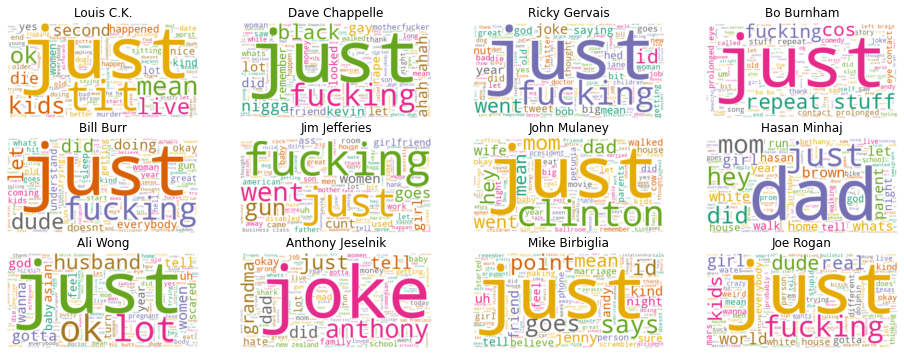

In [ ]:
#creating a word cloud of our comedians. 
for index,comedian in enumerate(data_df.index):
  wc.generate(data_df.Transcripts[comedian])
  plt.subplot(3,4, index+1)
  plt.imshow(wc, interpolation="bilinear")
  plt.axis("off")
  plt.title(full_names[index])
plt.show()  

**Findings**:

A lot of F word is getting used.
The word "just" has been used a lot.

**Word Analysis**

In [ ]:
#Find a number of unique words used by the comedians.
unique_list=[]
for comedian in data_df.index:
  word=data_dtm[comedian].to_numpy().nonzero()[0].size
  unique_list.append(word)

In [ ]:
data_unique=pd.DataFrame(list(zip(full_names,unique_list)),columns=['fullname','unique_count'])
data_unique.sort_values(by='unique_count')
data_unique=data_unique.sort_values(by='unique_count')

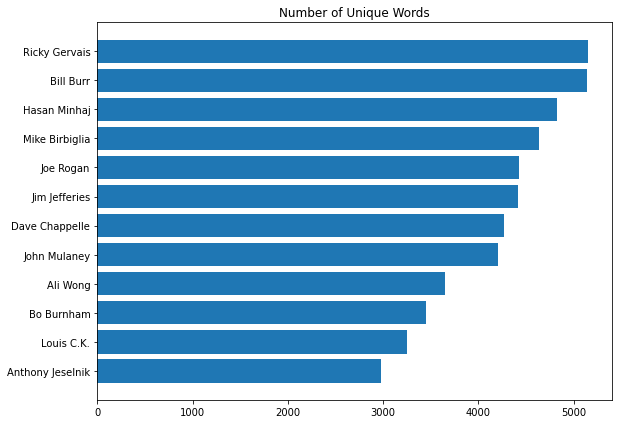

In [ ]:
import numpy as np
y_pos=np.arange(len(data_unique))
plt.subplot(1,2,1)
plt.barh(y_pos,data_unique.unique_count,align='center')
plt.yticks(y_pos,data_unique.fullname)
plt.title('Number of Unique Words')
plt.tight_layout()

**Findings:**
It appears that Ricky Gervais and Bill Burr has similar command over english vocabulary. 

**Sentiment Analysis:**

When it comes to text data, we have some techniques to use to analyse the sentiment of the statement. However, these techniques are quiet rudimentary techniques and may not be that accurate.

**TextBlob:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.

**Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity. There are more labels but we will consider only these two for now. A corpus' sentiment is the average of these


**Polarity:** How positive or negative a word is. -1 is very negative. +1 is very positive.

**Subjectivity:** How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.



In [ ]:
#we will start by importing textblob.

from textblob import TextBlob

In [ ]:
data_df['polarity']=data_df['Transcripts'].apply(lambda x: TextBlob(x).sentiment.polarity)
data_df['subjectivity']=data_df['Transcripts'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [ ]:
data_df.head()

,Transcripts,polarity,subjectivity
louis,introfade the music out lets roll hold there l...,0.052533,0.523539
dave,this is dave he tells dirty jokes for a living...,-0.004789,0.514810
ricky,hello hello how you doing great thank you wow ...,0.053464,0.508200
bo,bo what old macdonald had a farm e i e i o and...,0.073814,0.554008
bill,all right thank you thank you very much thank...,0.008257,0.543996


Text(0, 0.5, 'Subjectivity (Facts <-----------> Opinion)')

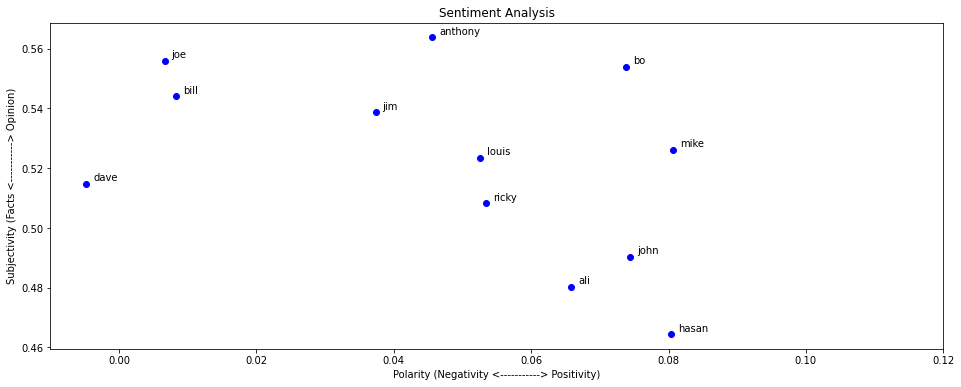

In [ ]:
#Let's plot the results.
for comedian in data_df.index:
  x=data_df.polarity.loc[comedian]
  y=data_df.subjectivity.loc[comedian]
  plt.scatter(x,y, color='blue')
  plt.text(x+0.001,y+0.001,comedian)
  plt.xlim(-0.01, 0.12)
plt.title('Sentiment Analysis', fontsize=12)  
plt.xlabel('Polarity (Negativity <-----------> Positivity)')
plt.ylabel('Subjectivity (Facts <-----------> Opinion)')  

With the above analysis we could determine where each comedian falls on the subjectivity VS polarity graph. 

**Topic Modelling:** 

For topic Modelling we will use **Latent Dirichlet Allocation(LDA)** which is a popular topic modelling algorithm. We need to feed this algorithm with a document term matrix and the number of topics we need the algo to identify. We then need to use human judgement to identify the topics within. 

In [ ]:
from gensim import matutils, models
from nltk import word_tokenize,pos_tag
import scipy.sparse

In [ ]:
#we are going to convert the tdm into the format that gensim library accepts which requires conversion into a sparse matrix and then into gensim corpus.

sparse_counts=scipy.sparse.csr_matrix(data_dtm.transpose())
corpus=matutils.Sparse2Corpus(sparse_counts)
dict2word=dict((k,c) for c,k in cv.vocabulary_.items())

In [ ]:
lda=models.LdaModel(corpus=corpus,id2word=dict2word,num_topics=5,passes=20)
lda.print_topics()

[(0,
  '0.176*"aaaaauuugghhhhhh hard" + 0.173*"aah" + 0.172*"aaaahhhhh" + 0.138*"aaaaahhhhhhh god" + 0.125*"aaah scary" + 0.000*"aaaaah" + 0.000*"aaaahhhhh aaaaahhhhhhh" + 0.000*"aaaaah anybody" + 0.000*"aaaaahhhhhhh" + 0.000*"aaah"'),
 (1,
  '0.265*"aaaaauuugghhhhhh" + 0.233*"aaaaah anybody" + 0.222*"aah aah" + 0.000*"aaaaah" + 0.000*"aaaahhhhh aaaaahhhhhhh" + 0.000*"aaaaahhhhhhh" + 0.000*"aaah" + 0.000*"aaaahhhhh" + 0.000*"aaah scary" + 0.000*"aaaaauuugghhhhhh hard"'),
 (2,
  '0.389*"aaaaah" + 0.000*"aaaahhhhh" + 0.000*"aaaaahhhhhhh god" + 0.000*"aaaahhhhh aaaaahhhhhhh" + 0.000*"aaaaah anybody" + 0.000*"aaaaauuugghhhhhh" + 0.000*"aaaaahhhhhhh" + 0.000*"aaah" + 0.000*"aaah scary" + 0.000*"aaaaauuugghhhhhh hard"'),
 (3,
  '0.383*"aaaaahhhhhhh" + 0.241*"aaah" + 0.000*"aaaaah" + 0.000*"aaaahhhhh aaaaahhhhhhh" + 0.000*"aaah scary" + 0.000*"aaaaahhhhhhh god" + 0.000*"aaaaauuugghhhhhh" + 0.000*"aaaahhhhh" + 0.000*"aaaaauuugghhhhhh hard" + 0.000*"aaaaah anybody"'),
 (4,
  '0.470*"aaaahhhhh a

**Topic Modelling (Attempt 2):**

As we can see from the above list, it brings out no meaning and hence a common method to fix this is to take out only the nouns and ajectives. 

In [ ]:
#the below function shall extract noun and adjectives from the corpus.
from nltk import pos_tag
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def noun(text):
  #Given that we have a string we take out the advectives and noun from the data
  is_noun=lambda pos: pos[:2]=='JJ' or pos[:2]=='NN'
  tokenized=word_tokenize(text) 
  nouns=[word for (word,pos) in pos_tag(tokenized) if is_noun(pos)]
  return ' '.join(nouns)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#let's apply the noun function to our corpus to extract only noun and adjectives.
all_noun=pd.DataFrame(data_df.Transcripts.apply(noun))
all_noun=all_noun.reset_index()

In [ ]:
#we then recreate the dtm matrix to be feed into the topic modelling algorithm.
data_df_noun=pd.DataFrame(data_df.Transcripts.apply(noun))
cv_noun=CountVectorizer(stop_words=stopword_list_final, max_df=0.8)
data_df_noun_cv=cv_noun.fit_transform(data_df_noun.Transcripts)
data_df_noun_dtm=pd.DataFrame(data_df_noun_cv.toarray(), columns=cv_noun.get_feature_names())

In [ ]:
data_df_noun_dtm.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11
aaaaah,0,0,0,0,1,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aah,3,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zillion,0,0,0,0,1,0,0,0,0,0,0,0
zombie,0,0,0,0,1,0,0,0,1,0,0,0
zombies,0,0,0,0,1,0,0,0,0,0,0,0
zoo,0,0,1,0,0,0,0,0,0,0,0,0


In [74]:
#feeding data into LdaModel in the format it expects. 
sparse_counts_noun_adj=scipy.sparse.csr_matrix(data_df_noun_dtm.transpose())
corpus_nn_jj=matutils.Sparse2Corpus(sparse_counts_noun_adj)
dict2word=dict((k,c) for c,k in cv_noun.vocabulary_.items())
lda_nn_jj=models.LdaModel(corpus=corpus_nn_jj,id2word=dict2word,num_topics=4,passes=100,minimum_probability=0.7,decay=0.5)
lda_nn_jj.print_topics()

[(0,
  '0.006*"jenny" + 0.006*"guns" + 0.004*"ass" + 0.004*"class" + 0.004*"girlfriend" + 0.004*"girls" + 0.003*"business" + 0.003*"argument" + 0.003*"accident" + 0.003*"morning"'),
 (1,
  '0.007*"joke" + 0.004*"mom" + 0.004*"jokes" + 0.003*"comedy" + 0.003*"parents" + 0.003*"bo" + 0.003*"hasan" + 0.003*"door" + 0.003*"repeat" + 0.003*"hell"'),
 (2,
  '0.007*"mom" + 0.006*"clinton" + 0.005*"husband" + 0.005*"cow" + 0.004*"ok" + 0.004*"wife" + 0.003*"movie" + 0.003*"wan" + 0.003*"pregnant" + 0.003*"parents"'),
 (3,
  '0.007*"ahah" + 0.005*"tit" + 0.005*"gay" + 0.005*"nigga" + 0.005*"young" + 0.004*"ok" + 0.004*"murder" + 0.003*"son" + 0.003*"ha" + 0.003*"date"')]

**Topics Identified:**

0. parents
1. husband & wife
2. guns
3. profanity  



In [73]:
#putting the comedians and the topics identifed together. 
corpus_model=lda_nn_jj[corpus_nn_jj] 
list(zip([a for [(a,b)] in corpus_model],data_df_noun.index))

[(3, 'louis'),
 (0, 'dave'),
 (0, 'ricky'),
 (1, 'bo'),
 (1, 'bill'),
 (3, 'jim'),
 (1, 'john'),
 (0, 'hasan'),
 (0, 'ali'),
 (2, 'anthony'),
 (2, 'mike'),
 (1, 'joe')]

**Based on the above analysis below are the topis used by our comedians:**

1.  Louis,Jim: [Profanity]
2.  dave,ricky,hasan,ali: [parents]
3.  bo,bill,joe: [husband & wife]
4.  anthony,mike: [guns] 

